In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Original Dataset: https://archiveofourown.org/admin_posts/18804

works data dict:
creation date|
language|
word count|
restricted or not|
complete or not|
associated tag IDs|

tags data dict:
tag ID|
tag type (e.g. Warning, Fandom, Relationship)|
tag name (unless the tag has fewer than 5 uses)|
canonical or not|
an approximate number of uses|
merger ID (i.e. the tag's canonical version, if it has one)

In [2]:
works = pd.read_csv('../data/works.csv')
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN
...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+...,NaN


In [3]:
tags = pd.read_csv('../data/tags.csv')
tags

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


In [4]:
def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")

In [5]:
def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [6]:
tags_dict()

tags data dict:
tag ID
tag type (e.g. Warning, Fandom, Relationship)
tag name (unless the tag has fewer than 5 uses)
canonical or not
an approximate number of uses
merger ID (i.e. the tag's canonical version, if it has one)


In [7]:
hp_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['type'] != 'Redacted')].sort_values(by='cached_count', ascending=False).head(1)['id'].values[0]
hp_tag

136512

In [8]:
works.head()

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN


In [9]:
works['tags'] = works['tags'].astype('string')
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269693 entries, 0 to 7269692
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   creation date  object 
 1   language       object 
 2   restricted     bool   
 3   complete       bool   
 4   word_count     float64
 5   tags           string 
 6   Unnamed: 6     float64
dtypes: bool(2), float64(2), object(2), string(1)
memory usage: 291.2+ MB


In [10]:
hp_works = works.loc[works['tags'].str.contains(str(hp_tag))]
hp_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
30,2021-02-26,en,False,True,37.0,9+136512+17106+11235+572192+21+14,NaN
45,2021-02-26,en,False,True,1608.0,13+136512+10760+1048+1589+2174+2157+974+2211+1...,NaN
107,2021-02-26,en,False,False,2900.0,10+136512+1110+89592+93721+1754932+4429418+23+16,NaN
147,2021-02-26,en,False,False,1404.0,11+136512+33035890+26740493+24757434+11987966+...,NaN
175,2021-02-26,en,False,True,3310.0,9+136512+15993+396+2927+315707+21+16,NaN
...,...,...,...,...,...,...,...
7268022,2008-11-18,en,True,True,9292.0,23+183+3868+3869+3844+2175+16+3845+3846+182+38...,NaN
7268023,2008-11-18,en,True,True,3344.0,23+183+3872+3844+2211+215+989+16+3808+1172+385...,NaN
7268036,2008-11-16,en,True,True,1381.0,23+183+1803+2211+16+62+2099+3803+60+11+3814+29...,NaN
7268123,2008-11-12,en,True,True,7408.0,23+183+3515+966+16+180+12+3805+3806+3807+3507+...,NaN


In [11]:
ds_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['type'] != 'Redacted')].sort_values(by='cached_count', ascending=False)['id'].values[3]

In [12]:
ds_works = works.loc[works['tags'].str.contains(str(ds_tag))]
ds_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
48,2021-02-26,en,False,True,1642.0,11+3828398+9927430+3741113+5747754+26481509+51...,NaN
76,2021-02-26,en,False,True,1224.0,12+3828398+4918711+3741110+3958226+634+27859+2...,NaN
78,2021-02-26,en,False,False,181.0,11+3828398+6817513+6817525+6817516+6817519+150...,NaN
99,2021-02-26,en,False,False,10197.0,11+3828398+244259+19652187+32611120+3741113+18...,NaN
100,2021-02-26,en,False,True,5788.0,10+3828398+4918711+261834+7002+110+30408248+10...,NaN
...,...,...,...,...,...,...,...
5914258,2015-02-11,en,False,True,3101.0,11+23+14+16+3828398+4188197+3741113+3741110+32...,NaN
5933537,2015-01-28,en,False,True,430.0,10+21+16+3828398+4132652+4132655,NaN
5957625,2015-01-09,en,False,False,1497.0,10+21+16+3828398+3925928+3925937+3985037+39850...,NaN
5962200,2015-01-06,en,False,False,57748.0,21+23+16+3828398+3741113+3741110+3958226+39582...,NaN


In [13]:
ds_works.sort_values(by='word_count', ascending=False)

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
2198155,2019-10-13,en,False,False,1100834.0,12+3828398+11910691+19826499+25183728+5747754+...,NaN
858083,2020-09-11,en,False,False,899373.0,11+3828398+11142052+11471641+9648448+10169198+...,NaN
98663,2021-02-10,en,False,True,841966.0,12+3828398+35639807+35486597+2927+479641+41842...,NaN
406374,2020-12-17,en,False,False,776786.0,10+3828398+4918711+3741110+3958226+51139539+23+14,NaN
3639866,2018-05-19,en,False,False,758004.0,12+3828398+5155513+23478684+14028806+17786112+...,NaN
...,...,...,...,...,...,...,...
2993245,2019-01-22,ru,False,True,NaN,11+3828398+15722793+3958247+5747754+23+14,NaN
2993281,2019-01-22,ru,False,True,NaN,11+3828398+10428124+9866728+9648448+2379+22+14,NaN
2993289,2019-01-22,ru,False,True,NaN,11+3828398+8689789+24004281+176+30924+22+14,NaN
3499629,2018-07-15,en,False,False,NaN,11+3828398+2927+3741113+8689774+8688301+2246+17,NaN


In [14]:
works.groupby('complete')['word_count'].mean()

complete
False    15452.521308
True      5652.470240
Name: word_count, dtype: float64

In [15]:
ds_fic_dates = ds_works['creation date'].value_counts().to_frame().sort_values(by='creation date').reset_index()
ds_fic_dates

,creation date,count
0,2012-10-07,1
1,2015-01-06,1
2,2015-01-09,1
3,2015-01-28,1
4,2015-02-11,1
...,...,...
1875,2021-02-22,257
1876,2021-02-23,221
1877,2021-02-24,222
1878,2021-02-25,209


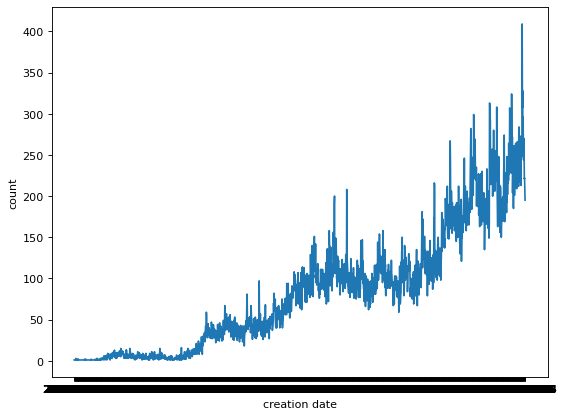

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=ds_fic_dates, x=ds_fic_dates['creation date'], y=ds_fic_dates['count'])
plt.show()

In [17]:
hp_fic_dates = hp_works['creation date'].value_counts().to_frame().sort_values(by='creation date').reset_index()
hp_fic_dates

,creation date,count
0,2008-11-12,2
1,2008-11-16,1
2,2008-11-18,6
3,2008-11-20,1
4,2009-02-28,6
...,...,...
3956,2021-02-22,244
3957,2021-02-23,239
3958,2021-02-24,238
3959,2021-02-25,178


In [18]:
hp_fic_dates.sort_values(by='count', ascending=False)

,creation date,count
2565,2017-05-03,2055
2734,2017-10-19,1798
2563,2017-05-01,1787
2354,2016-10-04,1019
2504,2017-03-03,882
...,...,...
158,2010-08-18,1
157,2010-08-17,1
156,2010-08-15,1
155,2010-08-12,1


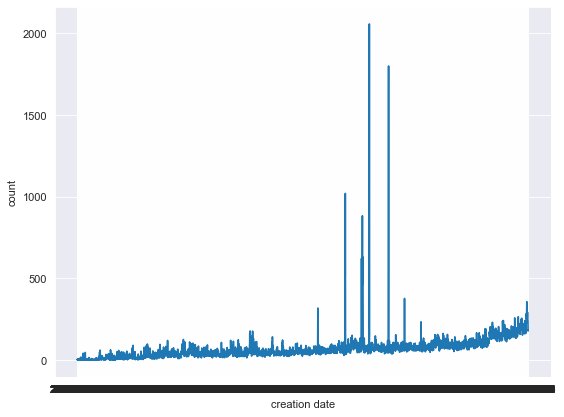

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=hp_fic_dates, x=hp_fic_dates['creation date'], y=hp_fic_dates['count'])
plt.show()

In [20]:
tt_tag = tags.loc[tags['name'] == 'Time Travel Fix-It']['id'].values[0]

In [21]:
tt_works = works.loc[works['tags'].str.contains(str(tt_tag))]
tt_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
422,2021-02-26,en,False,False,2715.0,11+46023568+34700573+34700402+28596122+5459702...,NaN
1847,2021-02-26,en,False,False,2160.0,11+11812534+41988151+42549511+42197830+4181608...,NaN
2098,2021-02-26,en,False,False,1687.0,12+136512+3458+18827+1048+2211+15935+967+321+1...,NaN
3274,2021-02-26,en,False,False,3014.0,10+414093+1001939+32833447+727283+9794104+1415...,NaN
3729,2021-02-26,en,False,False,806.0,11+13999+116711+3828398+35078363+1092377+14037...,NaN
...,...,...,...,...,...,...,...
6925050,2012-06-05,en,False,False,71783.0,11+22+17+18+1803+2174+199229+2157+2927+15890+3...,NaN
7033135,2011-12-04,en,False,True,1922.0,11+21+16+57398+104000+241492+315851+315853+113...,NaN
7049642,2011-10-19,en,True,True,75027.0,13+116+23+136512+1803+10980+2357+1806+1469+149...,NaN
7058283,2011-09-20,en,False,True,66632.0,12+23+20+10795+31806+14352+12907+31660+14371+1...,NaN


In [22]:
fandom_tags = tags.loc[(tags['type'] == 'Fandom') & (tags['name'] != 'Redacted')]['id'].tolist()
fandom_tags

[27,
 37,
 46,
 56,
 65,
 70,
 83,
 90,
 91,
 114,
 121,
 129,
 162,
 164,
 169,
 183,
 187,
 196,
 203,
 206,
 250,
 259,
 266,
 272,
 273,
 287,
 288,
 337,
 340,
 346,
 353,
 365,
 370,
 379,
 383,
 386,
 390,
 406,
 413,
 431,
 442,
 450,
 452,
 457,
 462,
 469,
 489,
 494,
 505,
 515,
 519,
 522,
 528,
 531,
 538,
 541,
 550,
 641,
 645,
 659,
 673,
 685,
 698,
 703,
 708,
 720,
 722,
 729,
 741,
 751,
 760,
 771,
 778,
 826,
 827,
 833,
 839,
 871,
 884,
 885,
 886,
 901,
 910,
 919,
 922,
 930,
 934,
 935,
 943,
 951,
 954,
 960,
 963,
 979,
 1014,
 1023,
 1026,
 1030,
 1039,
 1054,
 1058,
 1061,
 1080,
 1091,
 1116,
 1120,
 1121,
 1157,
 1181,
 1186,
 1196,
 1199,
 1203,
 1246,
 1305,
 1312,
 1324,
 1331,
 1332,
 1333,
 1334,
 1335,
 1346,
 1402,
 1428,
 1438,
 1442,
 1448,
 1457,
 1464,
 1474,
 1480,
 1487,
 1488,
 1493,
 1503,
 1520,
 1532,
 1559,
 1571,
 1575,
 1619,
 1631,
 1673,
 1685,
 1703,
 1704,
 1710,
 1735,
 1747,
 1753,
 1766,
 1786,
 1795,
 1801,
 1820,
 1821,
 184

In [23]:
pd.set_option('display.max_colwidth', None)
works.head(1)

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+21+16,NaN


In [24]:
works['tags'][0].count("+") + 1

9

In [25]:
tags.loc[tags['name'] == 'Alternate Universe - Gods & Goddesses']

,id,type,name,canonical,cached_count,merger_id
147211,229465,Freeform,Alternate Universe - Gods & Goddesses,True,4591,NaN


In [26]:
works.loc[(works['creation date'] == '2018-04-16') & (works['language'] == 'en') & (works['complete'] == False) & (works['tags'].str.contains(str(10767))) & (works['complete'] == False) & (works['tags'].str.contains(str(229465	)))]

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
3713115,2018-04-16,en,False,False,5897.0,11+10767+3381314+12165+12176+708673+229465+13276405+22798662+853113+22798665+16+10768+1220563+12164+8036791,NaN


In [27]:
tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False)

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
...,...,...,...,...,...,...
9731584,37438366,Fandom,Redacted,False,0,2730336.0
9732014,37439944,Fandom,Moon Zero Two (1969),True,0,NaN
5313459,19686867,Fandom,Redacted,False,0,4122599.0
309932,520350,Fandom,Normal (2007),True,0,NaN


In [28]:
mv_tag = tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False)['id'].values[2]

In [29]:
mv_works = works.loc[works['tags'].str.contains(str(mv_tag))]
mv_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+21+16,NaN
7,2021-02-26,en,False,True,267.0,10+414093+1001939+4577144+1499536+110+4682892+21+16,NaN
17,2021-02-26,en,False,True,465.0,10+414093+1001939+11725627+14172+17783475+53456+110+176+54862860+116+16,NaN
23,2021-02-26,en,False,True,425.0,10+414093+1001939+5075896+18059+110+176+54862884+116+16,NaN
28,2021-02-26,en,False,True,531.0,10+414093+1001939+5075896+18059+579450+7267+460125+21+16,NaN
...,...,...,...,...,...,...,...
7222304,2010-01-24,en,False,True,6270.0,11+2246+16+3132+5358+10477+3175+430+19213+184+192+7072+142711+127828+29764+333321+414093+866449+66659+502578,NaN
7258597,2009-11-16,en,False,True,6920.0,11+21+70+77+3175+184+16+226657+414093,NaN
7259056,2009-11-16,en,False,True,4698.0,23+16+21300+3175+1469+2298+25324+11+226657+414093+30305+593891+1123146,NaN
7263298,2009-11-13,en,False,True,563.0,21+233+184+626+10213+3132+10641+3174+16+10+266936+10540219+62+16125960+69776+414093,NaN


In [30]:
mv_date_counts = mv_works['creation date'].value_counts().to_frame().reset_index()

In [31]:
mv_date_counts = mv_date_counts.sort_values(by='creation date', ascending=True)
mv_date_counts

,creation date,count
3228,2009-11-13,2
3226,2009-11-16,2
3106,2010-01-24,5
3263,2010-02-01,1
3042,2010-03-22,7
...,...,...
530,2021-02-22,112
747,2021-02-23,98
231,2021-02-24,141
349,2021-02-25,126


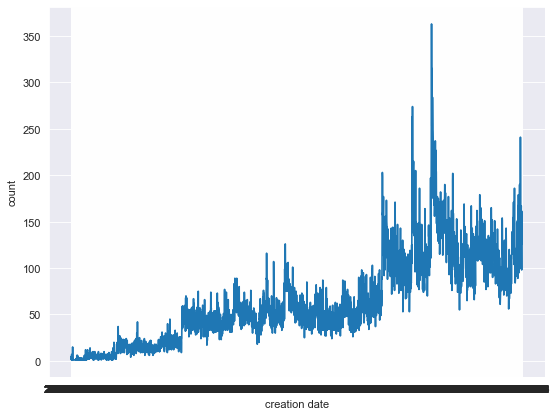

In [32]:
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=mv_date_counts, x=mv_date_counts['creation date'], y=mv_date_counts['count'])
plt.show()

In [33]:
mv_date_counts21 = mv_date_counts.loc[mv_date_counts['creation date'].str.contains(str(2021))]
mv_date_counts21

,creation date,count
45,2021-01-01,186
328,2021-01-02,129
615,2021-01-03,107
596,2021-01-04,108
786,2021-01-05,96
982,2021-01-06,84
948,2021-01-07,86
924,2021-01-08,88
797,2021-01-09,96
415,2021-01-10,121


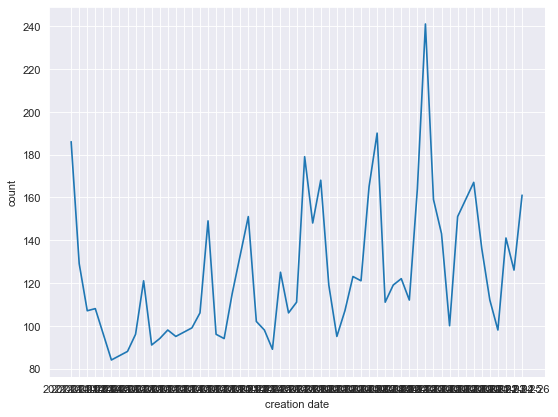

In [34]:
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=mv_date_counts21, x=mv_date_counts21['creation date'], y=mv_date_counts21['count'])
plt.show()

In [35]:
mv_date_counts['year'] = mv_date_counts['creation date'].str[:4]
mv_date_counts

,creation date,count,year
3228,2009-11-13,2,2009
3226,2009-11-16,2,2009
3106,2010-01-24,5,2010
3263,2010-02-01,1,2010
3042,2010-03-22,7,2010
...,...,...,...
530,2021-02-22,112,2021
747,2021-02-23,98,2021
231,2021-02-24,141,2021
349,2021-02-25,126,2021


In [36]:
mv_year_nums = mv_date_counts.groupby('year')['count'].sum().to_frame().reset_index()
mv_year_nums

,year,count
0,2009,4
1,2010,38
2,2011,55
3,2012,1591
4,2013,5776
5,2014,13660
6,2015,17788
7,2016,20644
8,2017,18183
9,2018,36013


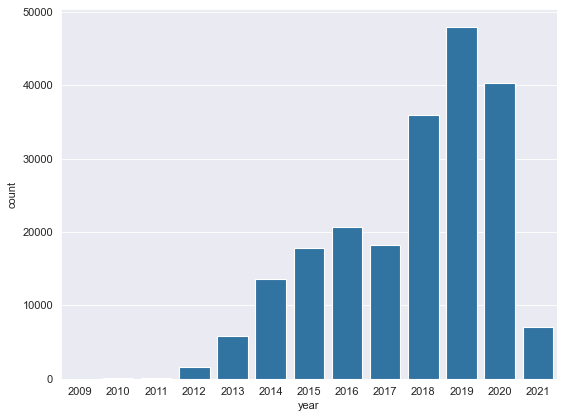

In [37]:
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(data=mv_year_nums, x=mv_year_nums['year'], y=mv_year_nums['count'])
plt.show()

In [38]:
tags.loc[tags['name'] == 'Time Travel']

,id,type,name,canonical,cached_count,merger_id
6146,7479,Freeform,Time Travel,True,80557,NaN


In [39]:
tags.loc[tags['name'] == 'Time Travel Fix-It']

,id,type,name,canonical,cached_count,merger_id
472455,729684,Freeform,Time Travel Fix-It,True,9665,NaN


In [40]:
mv_works['year'] = mv_works['creation date'].str[:4]
mv_works['year'] = mv_works['year'].astype('string')
mv_works.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209110 entries, 0 to 7263317
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   creation date  209110 non-null  object 
 1   language       209110 non-null  object 
 2   restricted     209110 non-null  bool   
 3   complete       209110 non-null  bool   
 4   word_count     209044 non-null  float64
 5   tags           209110 non-null  string 
 6   Unnamed: 6     0 non-null       float64
 7   year           209110 non-null  string 
dtypes: bool(2), float64(2), object(2), string(2)
memory usage: 11.6+ MB


C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\172853974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_works['year'] = mv_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\172853974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_works['year'] = mv_works['year'].astype('string')


In [41]:
mv_works.loc[(mv_works['year'] == '2019')]

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
1940418,2019-12-31,en,False,True,95329.0,1001939+12905+32197+262275+458255+518492+265238+53704+246056+3175+7267+147930+579450+13631+3133+13769+252971+147933+13851+12904+49071+2927+15163+3174+193602+3186323+184+2379+110+176+555+60+4847+4931+99181+205915+137+953387+489823+18567+427912+206640+544436+61+192+143795+22+21+23+2246+16+727114+586437+414093+13+2026+644206+862880,NaN,2019
1940433,2019-12-31,en,False,True,3502.0,13+414093+130638+1368642+3208934+2754045+37785901+37785904+7269+242171+17418783+147193+37785907+39127+69302+25788+123409+21326+466280+1275+4861774+30767+98700+37785910+14155163+37785913+22+17+19,NaN,2019
1940513,2019-12-31,en,False,True,6683.0,12+7266+414093+1001939+261582+272009+147933+7267+13631+80648+147930+3175+579450+13851+13507+1293+152201+1045478+10166+1009107+234149+77043+23+16+68929+705514+49223+12677+68251,NaN,2019
1940566,2019-12-31,en,False,True,3156.0,10+586439+414093+2026607+80648+1649242+888977+742970+1842707+243371+153728+33880+3016622+23+14,NaN,2019
1940594,2019-12-31,en,True,True,2030.0,9+414093+4159043+3175+16,NaN,2019
...,...,...,...,...,...,...,...,...
3054940,2019-01-01,en,False,True,1613.0,11+414093+157167+28631954+80648+3175+110+28631957+28631960+28631963+23+16,NaN,2019
3054961,2019-01-01,en,False,False,30044.0,11+5032+414093+390271+3175+5034+5035+6189+6186+6188+13507+5957714+7267+184+426909+496612+619590+28632110+13711+92733+22337718+9737119+28632113+551809+103132+1156738+10046920+500955+21+16+863580+1376004+49221+433735+245814+13900+7269+191766,NaN,2019
3054967,2019-01-01,en,False,True,3005.0,13+879346+414093+3913820+3103823+13714+3875132+1542+33310+182+116+16,NaN,2019
3054988,2019-01-01,en,False,True,1688.0,10+414093+65+157167+80648+3175+17874+23+16,NaN,2019


In [42]:
mv_works.loc[((mv_works['tags'].str.contains(str(7479))) | (mv_works['tags'].str.contains(str(729684)))) & (mv_works['year'] == '2019')]

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
1940643,2019-12-31,en,False,False,554.0,11+414093+1001939+32833447+11062891+20480928+32197+267347+110293+87272+7269+3175+870081+74988+3133+13507+147933+18059+579450+13631+80648+863580+23143599+31345921+37787527+729684+7479+37787530+22995636+37787533+31263256+37787536+585397+17254413+17883807+37787539+103132+37787542+9403837+11278798+1100006+23386887+37787545+1318610+99181+581439+37787548+37787551+21+14,NaN,2019
1942989,2019-12-31,en,False,True,2475.0,11+414093+1001939+586439+226657+7265+3175+7267+15198+139426+7512500+8816395+28040844+31261381+731752+31298140+7479+991995+68440+234149+439835+29441558+419016+597107+744536+23+16,NaN,2019
1945366,2019-12-30,en,False,True,255516.0,11+586439+1928582+414093+1001939+271715+273578+474577+2756928+475602+143947+2127625+7267+80648+15198+8287597+14084+1044540+579450+3175+4135064+387886+1114636+7479+37755391+37755394+37755397+37755400+443506+37755403+37755406+620133+2665542+37755409+28463150+31261381+22+21+23+17+3412778+4077131+17556+37946203+2927+40624519+43096144+43096147,NaN,2019
1945958,2019-12-30,en,False,False,7138.0,13+414093+43439+81134+37759855+22211925+3175+687908+315707+430997+7479+92733+22+23+2246+14,NaN,2019
1946766,2019-12-30,en,False,True,1674.0,10+414093+484757+464363+530120+1532161+17918817+740690+655605+577431+5388622+2715822+579450+13631+80648+19556+421104+4791279+4791277+587596+3362336+31263256+143795+18567+729684+33804007+602955+749184+33804010+3477638+33804013+2020031+33804889+32606125+4673574+37767190+21+16+702386,NaN,2019
...,...,...,...,...,...,...,...,...
3039831,2019-01-05,en,False,True,2335.0,11+414093+226657+5316694+1001939+23883500+32197+3133+3175+13507+3111377+10956+460125+108+7479+261834+22+23+2246+18+390271+260413,NaN,2019
3040100,2019-01-05,en,True,False,40492.0,11+586439+414093+110293+80648+7267+7479+74620+28725878+28725881+23+14+1012191+3175+479357+13631+13851+579450+147930+18059+1376004+604126+7334750+9520468,NaN,2019
3046191,2019-01-03,en,False,True,4431.0,13+414093+1001939+7266+727114+586439+578887+226657+7265+7267+3175+80648+272593+731872+733262+566192+7479+182+123409+2026+1127179+602804+579599+634+474609+22040202+23+16+1374590,NaN,2019
3047788,2019-01-03,en,False,False,9020.0,13+136512+578887+722204+414093+727114+7266+4790681+271715+1803+1048+80648+7267+15198+604126+637861+7479+60+176+61+62+476425+22+21+14,NaN,2019


In [43]:
works_dict()

works data dict:
creation date
language
word count
restricted or not
complete or not
associated tag IDs


In [44]:
mv_works = mv_works.sort_values(by='creation date')
mv_works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
7263317,2009-11-13,en,False,True,1713.0,21+233+11175+184+5358+3132+6265+3175+7072+16+11+16383+35678+19213+209411+564106+117645+127828+414093+298517,NaN,2009
7263298,2009-11-13,en,False,True,563.0,21+233+184+626+10213+3132+10641+3174+16+10+266936+10540219+62+16125960+69776+414093,NaN,2009
7258597,2009-11-16,en,False,True,6920.0,11+21+70+77+3175+184+16+226657+414093,NaN,2009
7259056,2009-11-16,en,False,True,4698.0,23+16+21300+3175+1469+2298+25324+11+226657+414093+30305+593891+1123146,NaN,2009
7222293,2010-01-24,en,False,True,7797.0,11+21+16+3132+3175+17874+3133+8005+19213+192+209411+127828+29764+333321+414093+13028227+496612+764792+478809+1390+19690+118139,NaN,2010
...,...,...,...,...,...,...,...,...
4018,2021-02-26,en,False,True,686.0,9+414093+1001939+7266+727114+586439+578887+1486747+1876919+80648+10315+295597+512801+118914+70534+124262+2717+62545+22+19,NaN,2021
3998,2021-02-26,en,False,True,24.0,13+414093+727114+257188+13631+3174+888787+75779+16111569+200234+478186+70308+427092+23+16,NaN,2021
3991,2021-02-26,en,False,True,373.0,9+414093+1001939+7266+727114+586439+578887+1486747+1876919+80648+116182+10315+128788+38425+803968+242+22+16,NaN,2021
4318,2021-02-26,en,False,True,558.0,9+414093+1001939+7266+727114+586439+578887+259126+537486+1951436+7267+10836+10315+17079+242+38424+644206+2026+22+19,NaN,2021


<Axes: xlabel='year', ylabel='Count'>

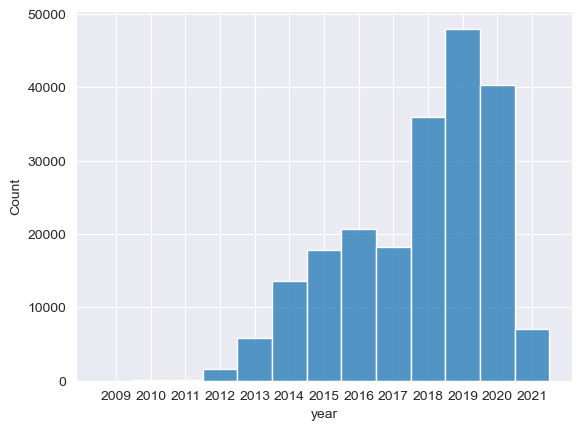

In [45]:
sns.histplot(data=mv_works, x=mv_works['year'])

In [46]:
works['year'] = works['creation date'].astype('string').str[:4]
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+21+16,NaN,2021
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+23269308+25382106+54629895+265399+105139+6207045+2509086+4483454+21741408+2791+21+16,NaN,2021
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30052928+54862740+54862743+3958232+3741113+13041709+8689774+39239518+21073668+36386338+54862746+54862749+54862752+24+14,NaN,2021
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+4717518+2096+54862758+54862761+54862764+54862767+21+16,NaN,2021
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862770+54862773+54862776+3305075+1125+3820+1033020+1003553+21+16+1163743,NaN,2021
...,...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN,2008
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN,2008
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN,2008
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+10128+39120,NaN,2008


<Axes: xlabel='year', ylabel='Count'>

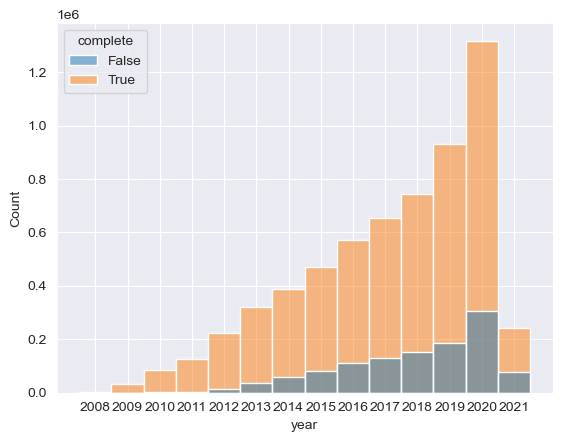

In [47]:
works = works.sort_values(by='year')
sns.histplot(data=works, x=works['year'], hue=works['complete'])

In [48]:
works_dict()

works data dict:
creation date
language
word count
restricted or not
complete or not
associated tag IDs


In [49]:
ac_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Assassin's Creed"))].sort_values(by='cached_count', ascending=False)['id'].values[0]
ac_works = works.loc[works['tags'].astype('string').str.contains(str(ac_tag))]
ac_works['year'] = ac_works['creation date'].str[:4]
ac_works['month'] = ac_works['creation date'].str[5:7]
ac_works['sm_date'] = ac_works['creation date'].str[0:7]
ac_works.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\3697222189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_works['year'] = ac_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\3697222189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_works['month'] = ac_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\3697222189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
6613862,2013-06-08,en,False,True,17189.0,11+21+627963+143795+779411+896493+2927+700357+926769+17+18+13220272,NaN,2013,06,2013-06
6397500,2014-01-16,en,False,True,4375.0,23+14+7071+779411+475013+1315892+1315893+11+4691307+1188054+14122790+13220272,NaN,2014,01,2014-01
6087415,2014-10-01,en,False,True,152135.0,12+22+479641+219972+166426+494522+64025+1112412+254786+851192+1529902+3071726+139227+1125332+1150387+560619+7479+481442+204906+237633+1739+4016048+502911+504682+1241839+438656+3055874+968+18567+720532+143795+23+969154+7564670+17+320962+2694+48938+214629+166441+488901+13546382+2502102+834739+96648+729684+27728398+27728395+3482636+220187+27728401+27728404+13220272,NaN,2014,10,2014-10
5726787,2015-06-18,en,False,True,885.0,22+14+56917+5497071+452724+8005+432676+11+879613+13220272+23745470+588793+1125,NaN,2015,06,2015-06
5664526,2015-07-29,en,False,True,4.0,21+16+166426+420068+253858+130166+11+262751+13220272,NaN,2015,07,2015-07
...,...,...,...,...,...,...,...,...,...,...
3320,2021-02-26,zh,False,True,12070.0,12+13220272+1174905+627963+1112412+23+19,NaN,2021,02,2021-02
3414,2021-02-26,en,False,False,5585.0,13220272+27764995+23933495+24969300+6276+1150387+126087+101411+16873+230661+275609+360650+5212+476425+110+2026+3435+148+208126+1220+132943+36564502+54894588+22+21+16+11,NaN,2021,02,2021-02
3946,2021-02-26,en,False,True,2000.0,13+13220272+49775902+52301877+41766427+49775582+49620688+54899364+54899367+54899370+2026+87951+8258+8259+171+110+22+17+3870,NaN,2021,02,2021-02
15025,2021-02-23,en,False,True,2148.0,11+13220272+49775902+41766427+49775582+50093384+438319+20544+6719+34610+116+16+14,NaN,2021,02,2021-02


In [50]:
ac_sm_dates = ac_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

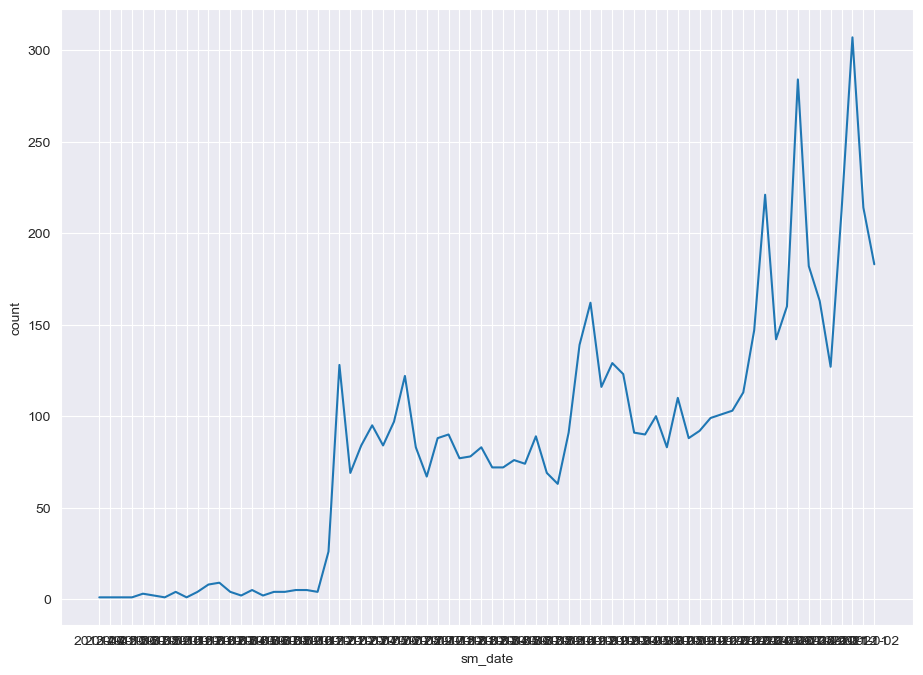

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=ac_sm_dates, x=ac_sm_dates['sm_date'], y=ac_sm_dates['count'])
plt.show()

In [52]:
tags.loc[tags['type'] == 'Fandom'].sort_values(by='cached_count', ascending=False).head(15)

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
25,27,Fandom,Supernatural,True,310300,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
1553725,3828398,Fandom,僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia,True,204096,NaN
680695,1002903,Fandom,방탄소년단 | Bangtan Boys | BTS,True,203097,NaN
168289,258526,Fandom,Teen Wolf (TV),True,172802,NaN
679946,1001939,Fandom,The Avengers (Marvel Movies),True,157813,NaN
92059,133185,Fandom,Sherlock (TV),True,151925,NaN
5974,7266,Fandom,Marvel,True,147757,NaN
494603,758208,Fandom,Haikyuu!!,True,130918,NaN


In [53]:
wr_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains("Wolf's Rain"))].sort_values(by='cached_count', ascending=False)['id'].values[0]


In [54]:
wr_works = works.loc[works['tags'].astype('string').str.contains(str(wr_tag))]
wr_works['year'] = wr_works['creation date'].str[:4]
wr_works['month'] = wr_works['creation date'].str[5:7]
wr_works['sm_date'] = wr_works['creation date'].str[0:7]
wr_works.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\2564738811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_works['year'] = wr_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\2564738811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_works['month'] = wr_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_21448\2564738811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
7187298,2010-06-25,en,True,False,3651.0,12+126982+60+23+2246+127003+127004+127005+127006+127007+2379+17+19+20+127008+40619+127009+127010+127011,NaN,2010,06,2010-06
7171907,2010-09-13,en,False,True,647.0,10+14+126982+143020,NaN,2010,09,2010-09
7142229,2011-01-15,en,False,True,489.0,10+21+16+126982+8005+155+176+14557,NaN,2011,01,2011-01
7139901,2011-01-23,en,False,True,686.0,21+18+126982+10+243310+129392+129399+129394+129393+220209+754787+754788+800,NaN,2011,01,2011-01
7108234,2011-05-01,en,False,True,612.0,10+116+14+126982+243308+243309+243310+1542+110+4349,NaN,2011,05,2011-05
...,...,...,...,...,...,...,...,...,...,...
196326,2021-01-24,en,False,True,1664.0,9+126982+129400+129399+129392+27894+24+14,NaN,2021,01,2021-01
195941,2021-01-24,en,False,True,1314.0,10+126982+32354338+129399+127008+131424+23+14+53225664+53225667+53225670,NaN,2021,01,2021-01
195992,2021-01-24,en,False,True,1036.0,10+126982+53056812+129399+129393+405675+14,NaN,2021,01,2021-01
190750,2021-01-25,en,False,True,2179.0,9+126982+129399+129392+129393+53109585+3348+24+14,NaN,2021,01,2021-01


In [55]:
wr_sm_dates = wr_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

In [56]:
wr_sm_dates

,sm_date,count
0,2010-06,1
1,2010-09,1
2,2011-01,2
3,2011-05,1
4,2011-12,1
...,...,...
85,2020-10,4
86,2020-11,8
87,2020-12,3
88,2021-01,6


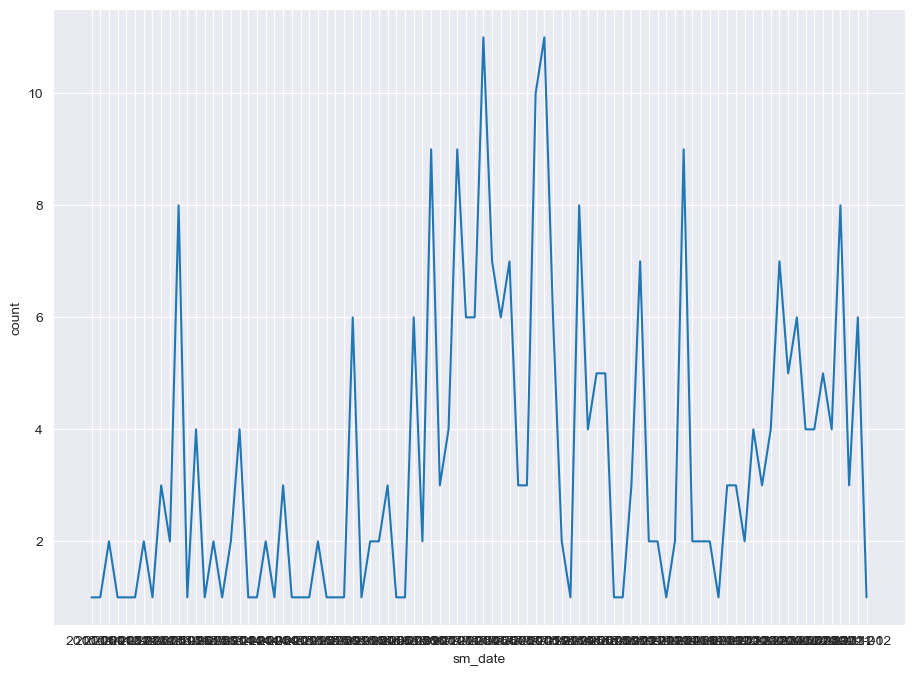

In [57]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=wr_sm_dates, x=wr_sm_dates['sm_date'], y=wr_sm_dates['count'])
plt.show()

In [58]:
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
7269692,2008-09-13,en,False,True,1836.0,123+124+125+127+128+13+129+14+130+131+132+133+134+135+136+138+2246+2832+2831+968+39120,NaN,2008
7268360,2008-10-25,en,False,True,897.0,22+386+10+409+414+16+4905+18088+92676,NaN,2008
7268361,2008-10-25,en,False,True,1134.0,22+386+2938+13+409+14+176+781,NaN,2008
7268362,2008-10-25,en,False,True,3026.0,22+386+2938+13+409+414+14+176+1508+2953,NaN,2008
7268363,2008-10-25,en,False,True,1558.0,2246+386+2938+927+13+409+414+14+176+1508+2954,NaN,2008
...,...,...,...,...,...,...,...,...
212220,2021-01-21,en,False,False,10034.0,11+10736+29973143+4284+71282+7741273+4285+3084+3075+30327+836+10385+13930+1149927+1149928+1149931+1269498+1129311+1136713+52927809+4416242+1153964+1149929+22+21+2246+17+52912176+52932039+52932042+979326+206640+152726+197161+239221+52912185+52932045+83632+882015+4106+10188838+27070+52932048+52932051+52932054+52912200+52912203+52933113,NaN,2021
212221,2021-01-21,en,False,True,3717.0,11+6226+959144+38457+850+37027+24231+19232+22334+58103+479641+494522+33043468+21973+67675+19398+88475+52927815+52927818+21+16,NaN,2021
212222,2021-01-21,en,False,True,1250.0,13+36532417+39931348+45760804+39917731+38133682+38900767+40141078+138958+703069+87580+55907+52927686+116+2246+14+20,NaN,2021
212215,2021-01-21,ru,False,True,584.0,10+35537+200992+200995+271861+21+16+742970,NaN,2021


In [59]:
#sns.histplot(data=works, x=works['language'], hue=works['language'])

In [60]:
tt1 = tags.loc[tags['name'] == 'Time Travel']['id'].values[0]
tt2 = tags.loc[tags['name'] == 'Time Travel Fix-It']['id'].values[0]

In [61]:
works.loc[(works['tags'].astype('string').str.contains(str(tt1))) | (works['tags'].astype('string').str.contains(str(tt2)))]

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
7244855,2009-12-14,en,False,True,301.0,11+22+16+1346+259+46950+184+7479+1576,NaN,2009
7244747,2009-12-14,en,False,True,7497.0,13+23+16+406+8147+6048+6053+182+60+7479+1759+37324+5431+17143395+1469+149505+41003+1127424+201909+1772+204864+81916+440727+834739,NaN,2009
7245041,2009-12-13,en,False,True,44588.0,22+184+46147+16+40764+183+11+7479,NaN,2009
7246027,2009-12-09,en,False,True,16525.0,11+3204+61+23+6159+7479+18+42984+6144+6145+8107+6148+6150+6147,NaN,2009
7245342,2009-12-12,en,False,True,7866.0,10+14+12741+1000+62+21+7479+43317+9394+13171+20526+966+3743+2927,NaN,2009
...,...,...,...,...,...,...,...,...
212098,2021-01-21,en,False,False,2912.0,758208+758209+1408234+836528+1362296+1089551+1329922+2607015+1870556+867666+758210+2059424+758211+3674798+836530+836529+912011+912012+770175+770174+1247383+776673+912010+1354929+1354930+1112112+1112113+867668+867667+52926759+853113+282254+6406133+614149+69977+110+409774+52926762+604127+2246+14+11+15445587+16950822+53944782+6852475,NaN,2021
212104,2021-01-21,en,False,False,681.0,12+309473+5437936+299358+241530+1252+1146+1035+150896+1188927+1000+4926+2717+853+17623+7479+116+22+23+17+18+19,NaN,2021
212321,2021-01-21,en,False,False,192.0,12+7367603+390+3995840+6166866+12674836+1764193+2565597+4104710+29205464+52928739+52928742+2843+2332+6065013+25989+52928745+143603+254415+134940+601925+7479+143795+99411+52928748+139227+103132+974308+52928751+58157+22+21+24+14+17+18+236208+4878889+53383+54604+94431+437175+16774+15015+618818+18923+16393209+4945690+30673+225712+28451+3529+10311+6719+507502+184,NaN,2021
212192,2021-01-21,en,False,True,48982.0,13+8474+143423+888923+47360+23512+8842+20722+2927+2776023+7125026+978508+1022+7479+261834+2026+1241096+31414846+52927650+52927653+9766+796237+52927656+639454+23+16+264+15473889+13401532+25005819+96631+69415+31258645+53149080,NaN,2021


In [64]:
works_years = works['year'].value_counts().to_frame().sort_values(by='year').reset_index()

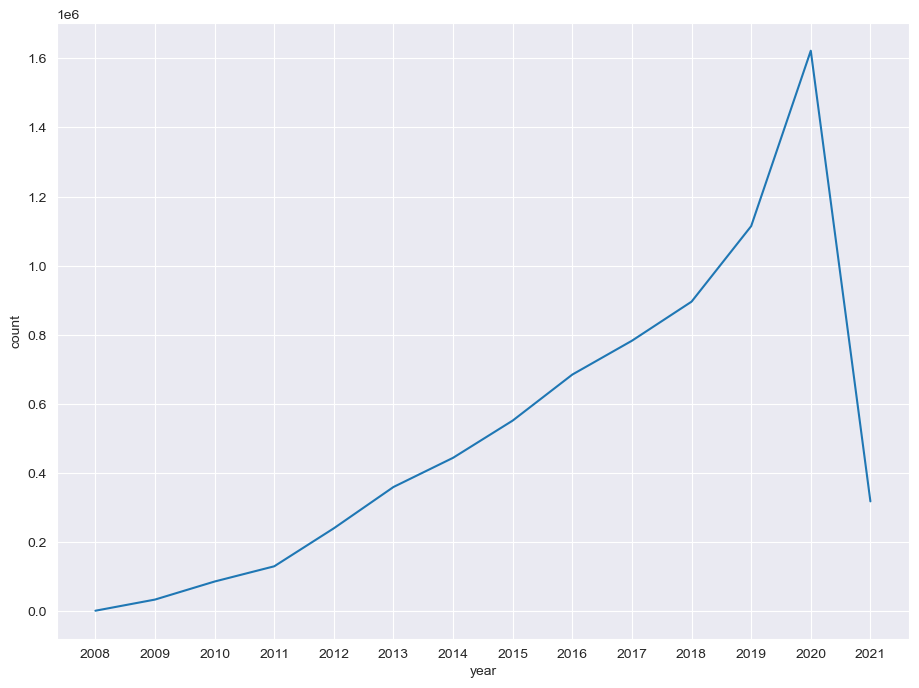

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=works_years, x=works_years['year'], y=works_years['count'])
plt.show()

In [66]:
works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
7269692,2008-09-13,en,False,True,1836.0,123+124+125+127+128+13+129+14+130+131+132+133+134+135+136+138+2246+2832+2831+968+39120,NaN,2008
7268360,2008-10-25,en,False,True,897.0,22+386+10+409+414+16+4905+18088+92676,NaN,2008
7268361,2008-10-25,en,False,True,1134.0,22+386+2938+13+409+14+176+781,NaN,2008
7268362,2008-10-25,en,False,True,3026.0,22+386+2938+13+409+414+14+176+1508+2953,NaN,2008
7268363,2008-10-25,en,False,True,1558.0,2246+386+2938+927+13+409+414+14+176+1508+2954,NaN,2008
...,...,...,...,...,...,...,...,...
212220,2021-01-21,en,False,False,10034.0,11+10736+29973143+4284+71282+7741273+4285+3084+3075+30327+836+10385+13930+1149927+1149928+1149931+1269498+1129311+1136713+52927809+4416242+1153964+1149929+22+21+2246+17+52912176+52932039+52932042+979326+206640+152726+197161+239221+52912185+52932045+83632+882015+4106+10188838+27070+52932048+52932051+52932054+52912200+52912203+52933113,NaN,2021
212221,2021-01-21,en,False,True,3717.0,11+6226+959144+38457+850+37027+24231+19232+22334+58103+479641+494522+33043468+21973+67675+19398+88475+52927815+52927818+21+16,NaN,2021
212222,2021-01-21,en,False,True,1250.0,13+36532417+39931348+45760804+39917731+38133682+38900767+40141078+138958+703069+87580+55907+52927686+116+2246+14+20,NaN,2021
212215,2021-01-21,ru,False,True,584.0,10+35537+200992+200995+271861+21+16+742970,NaN,2021


In [67]:
works.loc[works['creation date'] == '2021-02-26']

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year
1652,2021-02-26,en,False,True,1208.0,11+27785+8554600+941270+1779+404+405+2096+2694+23970+1012+176+135742+54878871+54878874+48237+127788+21+14,NaN,2021
1653,2021-02-26,en,False,False,1875.0,12+3828398+35577539+35515619+19361776+9411499+24964605+35486597+25966212+27082637+33617008+40491517+54878877+176+54878880+31830+875988+23542832+23+14+25097103,NaN,2021
1654,2021-02-26,en,False,False,629.0,10+41585728+42799966+42800158+42755413+49766942+49766867+14,NaN,2021
1655,2021-02-26,en,False,True,2366.0,13+52382346+52436448+52436433+52382358+1160+200234+90110+311184+23+16,NaN,2021
1656,2021-02-26,en,False,True,621.0,11+14943480+14943552+15092271+14933553+15050868+10132+54878895+663+214055+116+16,NaN,2021
...,...,...,...,...,...,...,...,...
3316,2021-02-26,en,False,True,4396.0,9+3828398+21044709+3958235+4598837+25890837+129557+507502+54893709+19727904+25748535+54893712+54893715+23+16+110+505774+1160,NaN,2021
3317,2021-02-26,en,False,False,2455.0,12+11987966+25760640+33035890+19506784+19506792+19506796+24832275+19864455+22538010+22712151+39048394+21021948+21021951+49878500+2816586+24798441+54893724+54893727+93403+29982+43990681+2340+54893730+38827+23+16+126089+11175+49174606,NaN,2021
3318,2021-02-26,en,False,True,1660.0,10+448284+8158966+1215211+54604+234149+7002+110+436532+1125+22+16,NaN,2021
3311,2021-02-26,en,False,True,0.0,12+2692+25975+52971603+47592565+15951546+112845+5704020+3863+53243628+145387+4769274+27723+285330+857+228199+69134+1211283+7085174+15015+8930+21+17,NaN,2021
